In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score,\
    confusion_matrix, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

from scipy import stats

sns.set_style("darkgrid")

# **1. Exploratory analysis**
The first thing we'll do is a quick exploratory analysis to gather some information on our dataset.

In [ ]:
df=pd.read_csv("creditcard 2.csv")

In [ ]:
df.shape

(284807, 31)

In [ ]:
df[['V12','V14','V17']].head()

,V12,V14,V17
0,-0.617801,-0.311169,0.207971
1,1.065235,-0.143772,-0.114805
2,0.066084,-0.165946,1.109969
3,0.178228,-0.287924,-0.684093
4,0.538196,-1.119670,-0.237033


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


0    284315
1       492
Name: Class, dtype: int64
0    0.998273
1    0.001727
Name: Class, dtype: float64


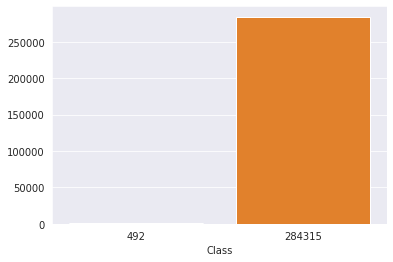

In [ ]:
vc = df.Class.value_counts()
sns.barplot(x=vc.index, y=vc.values, data=vc)
print(vc)
print(vc/vc.sum())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

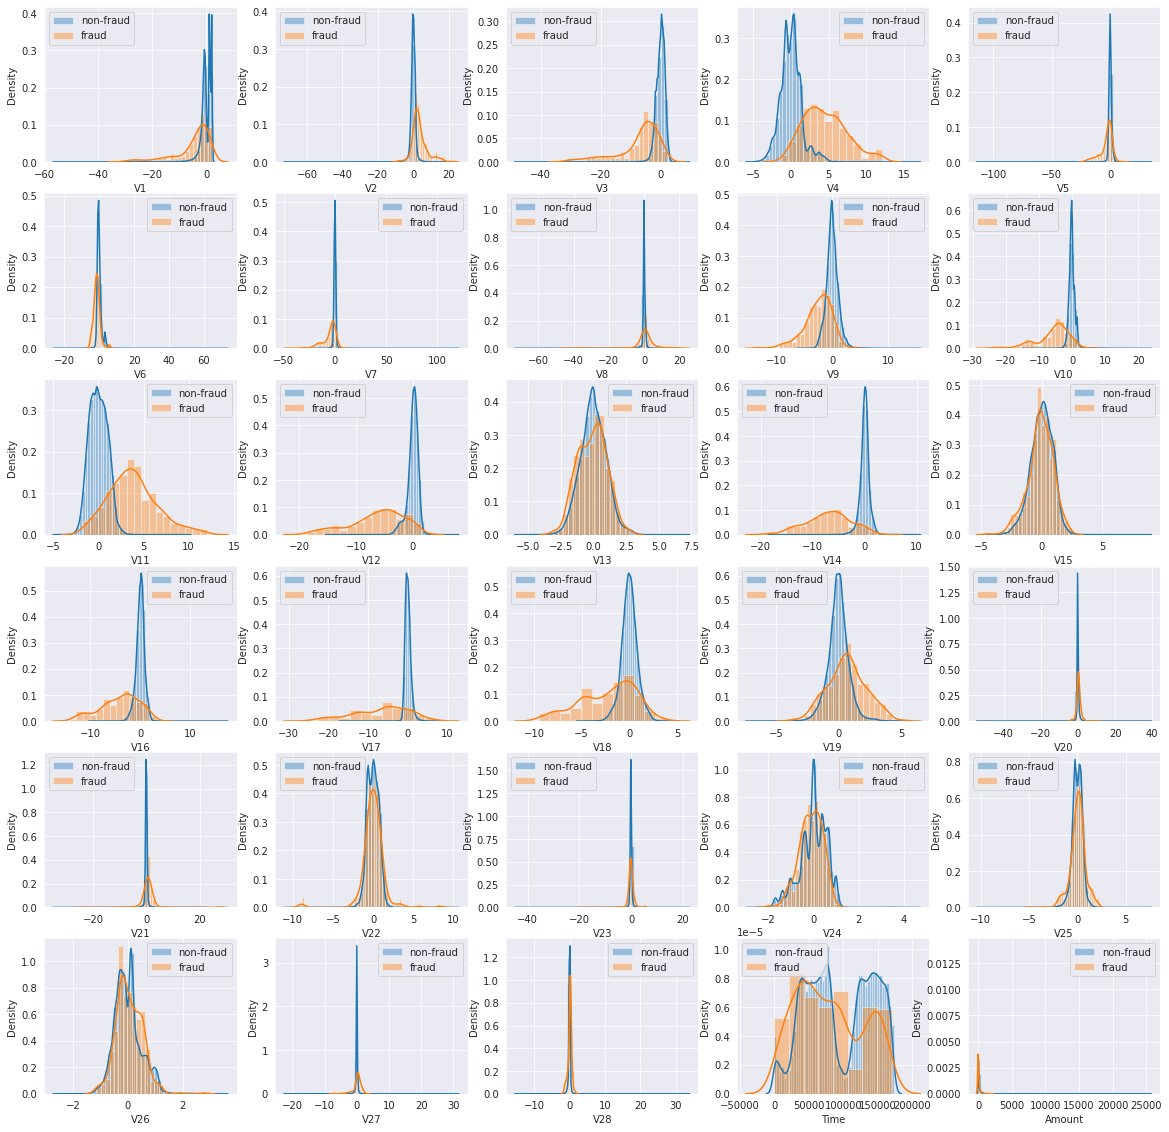

In [ ]:
fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(20,20))
for i in range(28):
    sns.distplot(df[df['Class'] == 0][f'V{i+1}'], ax=ax[i//5,i%5], label='non-fraud')
    sns.distplot(df[df['Class'] == 1][f'V{i+1}'], ax=ax[i//5,i%5], label='fraud')
    ax[i//5,i%5].legend()
sns.distplot(df[df['Class'] == 0]['Time'], ax=ax[5,3], label='non-fraud')
sns.distplot(df[df['Class'] == 1]['Time'], ax=ax[5,3], label='fraud')
ax[5,3].legend()
sns.distplot(df[df['Class'] == 0]['Amount'], ax=ax[5,4], label='non-fraud')
sns.distplot(df[df['Class'] == 1]['Amount'], ax=ax[5,4], label='fraud')
ax[5,4].legend()

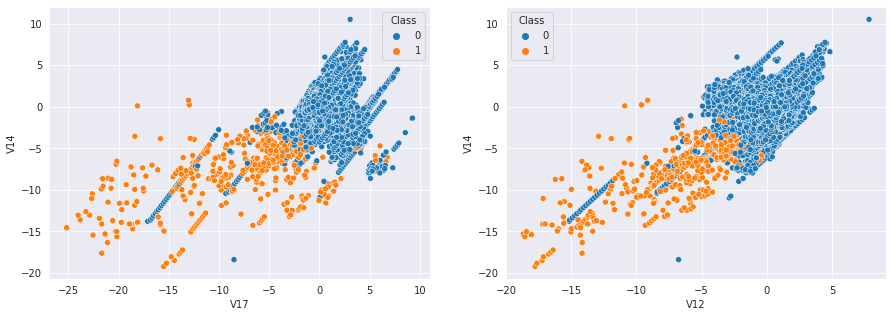

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(x='V17', y='V14', hue='Class', data=df, ax=ax[0])
sns.scatterplot(x='V12', y='V14', hue='Class', data=df, ax=ax[1])

In [ ]:
corr = df.corr()
corr.Class

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

In [ ]:
class OneWaySkewReduction(BaseEstimator, TransformerMixin):
    """
    Custom transformer to reduce skewness. The process consists in
    squaring the signal before using the box-cox transformation.
    """
    def __init__(self):
        # Stores the best box-cox lambda after fitting
        self._params = {}
    
    def fit(self, X, y=None):
        # For each column in the training data, find the lambda
        # that maximizes the log-likelihood in the box-cox transf.
        for col in X:
            self._params[col] = None
            _, self._params[col] = self.skew_reduction(X[col])
        return self
    
    def transform(self, X, y=None):
        _X = X.copy()
        for col in X:
            _X[col] = self.skew_reduction(X[col], self._params[col])
        return _X
    
    def skew_reduction(self, X, lmbda=None):
        # Custom transformation function
        return stats.boxcox(np.power(X, 2) + np.finfo(float).eps, lmbda=lmbda)

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

# Find which coolumns in the training set have abs(skew) > 0.75
skewed_cols = X.columns[np.where(X.skew().abs() > 0.75)]

# Create the custom transformer
transformer = make_column_transformer(
    (StandardScaler(), ['Time']),
    (OneWaySkewReduction(), skewed_cols.values),
    remainder='drop'
)

# Replace the raw values in X
X[pd.Index(['Time']).append(skewed_cols)] = transformer.fit_transform(X)

In [ ]:
Xtr, Xte, Ytr, Yte = train_test_split(X, y, test_size=0.20,random_state=0, stratify=y)

In [ ]:
trvc = Ytr.value_counts()
tevc = Yte.value_counts()
trvc = trvc/trvc.sum()
tevc = tevc/tevc.sum()
print("Training dataset proportion")
print(trvc)
print("\nTesting dataset proportion")
print(tevc)

Training dataset proportion
0    0.998271
1    0.001729
Name: Class, dtype: float64

Testing dataset proportion
0    0.99828
1    0.00172
Name: Class, dtype: float64


In [ ]:
smote = SMOTE(sampling_strategy='minority')
Xsm, Ysm = smote.fit_resample(Xtr, Ytr)
Xsm.shape

(454902, 30)

In [ ]:
# Metrics for comparison
mtrs = {'Recall': recall_score, 'Accuracy': accuracy_score,\
        'Precision': precision_score, 'F1': f1_score}

# Models (set random_state for reproducibility)
mdls = {'LR Smote': LogisticRegression(random_state=0),
        'LR Imb.': LogisticRegression(random_state=0),
        'RF Smote': RandomForestClassifier(random_state=0),
        'RF Imb.': RandomForestClassifier(random_state=0),
        'AB Smote': AdaBoostClassifier(random_state=0),
        'AB Imb.': AdaBoostClassifier(random_state=0)}

In [ ]:
# Fit models using either the origintal training set or the
# SMOTE-balanced one
for m in mdls:
    if m.endswith('Smote'):
        mdls[m].fit(Xsm, Ysm)
    else:
        mdls[m].fit(Xtr, Ytr)

In [ ]:
# Compute the scoring metrics in the same dataset used for training
tr_res = []
for m in mdls:
    if m.endswith('Smote'):
        Ypr = mdls[m].predict(Xsm)
        tr_res.append([mtrs[mt](Ysm, Ypr) for mt in mtrs])
    else:
        Ypr = mdls[m].predict(Xtr)
        tr_res.append([mtrs[mt](Ytr, Ypr) for mt in mtrs])
pd.DataFrame(tr_res, columns=mtrs.keys(), index=mdls.keys())

,Recall,Accuracy,Precision,F1
LR Smote,0.927897,0.947224,0.965206,0.946184
LR Imb.,0.649746,0.999232,0.873720,0.745269
RF Smote,1.000000,1.000000,1.000000,1.000000
RF Imb.,1.000000,1.000000,1.000000,1.000000
AB Smote,0.952772,0.963966,0.974591,0.963558
AB Imb.,0.677665,0.999157,0.804217,0.735537


In [ ]:
te_res = {}
cf_mat = {}
for m in mdls:
    Ypr = mdls[m].predict(Xte)
    te_res[m] = [mtrs[mt](Yte, Ypr) for mt in mtrs]
    cf_mat[m] = confusion_matrix(Yte, Ypr)

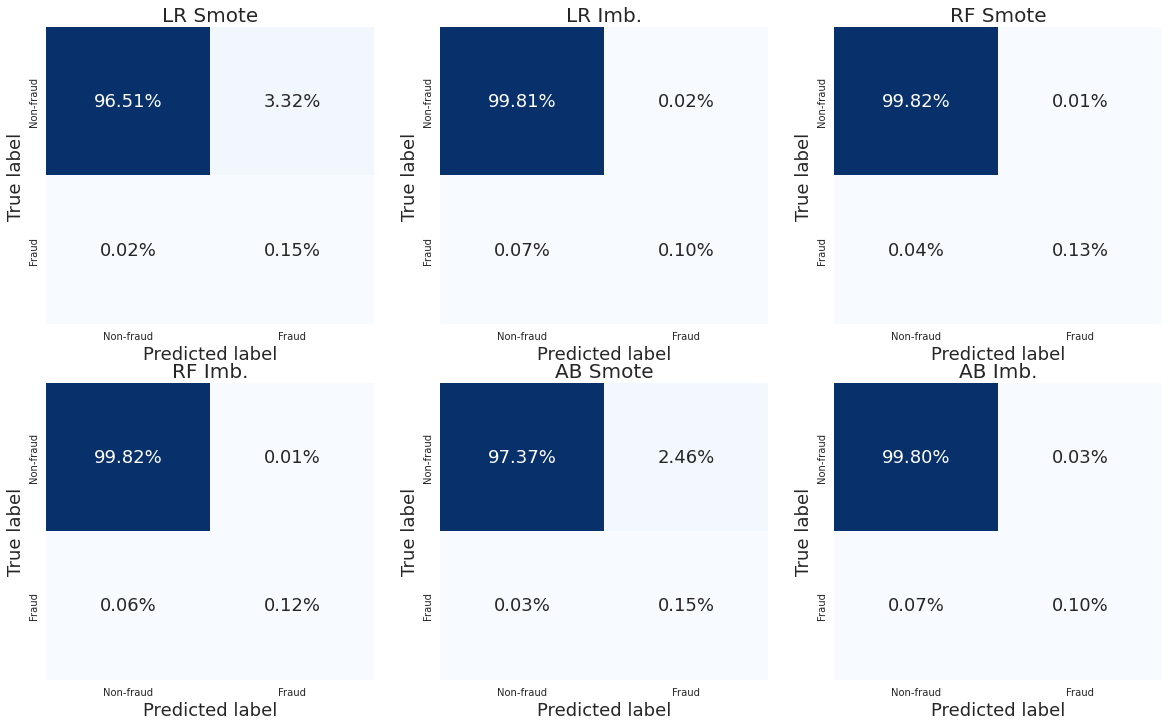

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
ticks = ['Non-fraud','Fraud']
k = 0
for i in cf_mat:
    with sns.plotting_context('notebook', font_scale=1.5):
        sns.heatmap(cf_mat[i]/np.sum(cf_mat[i]), annot=True,\
                fmt='.2%', cmap='Blues', cbar=False, xticklabels=ticks,\
                yticklabels=ticks, ax=ax[k//3,k%3], )
    ax[k//3,k%3].set_ylabel('True label', fontsize=18)
    ax[k//3,k%3].set_xlabel('Predicted label', fontsize=18)
    ax[k//3,k%3].set_title(i, fontsize=20)
    k = k + 1

In [ ]:
pd.DataFrame(te_res, index=mtrs.keys()).T

,Recall,Accuracy,Precision,F1
LR Smote,0.877551,0.966592,0.043500,0.082892
LR Imb.,0.581633,0.999087,0.838235,0.686747
RF Smote,0.765306,0.999508,0.937500,0.842697
RF Imb.,0.673469,0.999386,0.956522,0.790419
AB Smote,0.846939,0.975124,0.055892,0.104864
AB Imb.,0.602041,0.999052,0.797297,0.686047


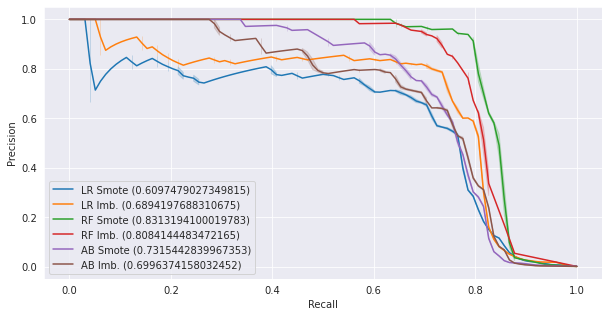

In [ ]:
# Compute the precision-recall curve
rpcurve = {}
for m in mdls:
    Ysc = mdls[m].predict_proba(Xte)[:,1]
    precision, recall, threshold = precision_recall_curve(Yte, Ysc)
    rpcurve[m] = pd.DataFrame(np.vstack((precision, recall)).T, columns=['Precision', 'Recall'])

# Plot the precision-recall curve
fig, ax = plt.subplots(figsize=(10,5))
for m in mdls:
    area = auc(rpcurve[m].Recall, rpcurve[m].Precision)
    sns.lineplot(x='Recall', y='Precision', data=rpcurve[m], ax=ax, label=f'{m} ({area})')